# import library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# read file

In [3]:
df = pd.read_csv("C:\\Users\\FPTSHOP\\Downloads\\GDPlist.csv", encoding='windows-1252')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Country                125 non-null    object
 1   Continent              125 non-null    object
 2   GDP (millions of US$)  125 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 3.1+ KB


In [4]:
df.head()

,Country,Continent,GDP (millions of US$)
0,Afghanistan,Asia,18181
1,Albania,Europe,12847
2,Algeria,Africa,190709
3,Angola,Africa,100948
4,Argentina,South America,447644


In [6]:
df.isna().sum()

Country                  0
Continent                0
GDP (millions of US$)    0
dtype: int64

# kiểm định Trung bình GDP của các quốc gia trên thế giới là 500 tỉ usd/năm

In [12]:
df['GDP (millions of US$)'].describe()

count    1.250000e+02
mean     5.554278e+05
std      1.649266e+06
min      1.060000e+04
25%      2.574200e+04
50%      9.608900e+04
75%      3.332380e+05
max      1.509402e+07
Name: GDP (millions of US$), dtype: float64

In [9]:
df_gdp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 5 to 118
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Country                23 non-null     object
 1   Continent              23 non-null     object
 2   GDP (millions of US$)  23 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 736.0+ bytes


+ tiến hành kiểm đinh giả thiết:
    + H0: = 500
    + H1:  # 500
    + với mức ý nghĩa là 5%

In [16]:
 df['GDP (millions of US$)'].mean()

555427.784

In [17]:
 df['GDP (millions of US$)'].std()

1649265.6802574366

In [14]:
test = stats.ttest_1samp(df['GDP (millions of US$)'], df['GDP (millions of US$)'].mean())

In [19]:
test

Ttest_1sampResult(statistic=0.0, pvalue=1.0)

+ pvalue > apla => chấp nhận giả thiết H0
+ kết luận : giả thiết đưa ra là đúng


# GDP trung bình ở các quốc gia ở châu Âu cao hơn châu Á không

In [20]:
df['Continent'].unique()

array(['Asia', 'Europe', 'Africa', 'South America', 'Oceania',
       'North America'], dtype=object)

In [25]:
df_AsiaAndEurope = df[(df['Continent'] == 'Asia') | (df['Continent'] == 'Europe')]

In [26]:
df_AsiaAndEurope.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73 entries, 0 to 122
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Country                73 non-null     object
 1   Continent              73 non-null     object
 2   GDP (millions of US$)  73 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 2.3+ KB


In [27]:
df_AsiaAndEurope.head()

,Country,Continent,GDP (millions of US$)
0,Afghanistan,Asia,18181
1,Albania,Europe,12847
6,Austria,Europe,419243
7,Azerbaijan,Europe,62321
8,Bahrain,Asia,26108


# tiến hành kiểm định
    + giả thiết H0: châu âu >= châu Á
    + giả thiết H1: châu âu < châu Á
    + với mức ý nghĩa 5%

In [38]:
df_Asia = df_AsiaAndEurope[df_AsiaAndEurope['Continent'] == 'Asia']['GDP (millions of US$)']

In [39]:
df_europe = df_AsiaAndEurope[df_AsiaAndEurope['Continent'] == 'Europe']['GDP (millions of US$)']

<AxesSubplot:xlabel='GDP (millions of US$)', ylabel='Density'>

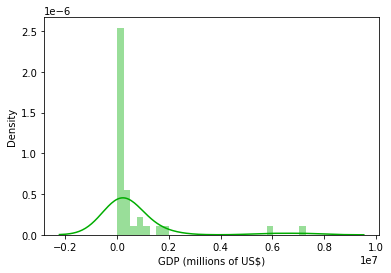

In [42]:
sns.distplot(df_Asia, color = '#00ad00')

C:\Users\FPTSHOP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GDP (millions of US$)', ylabel='Density'>

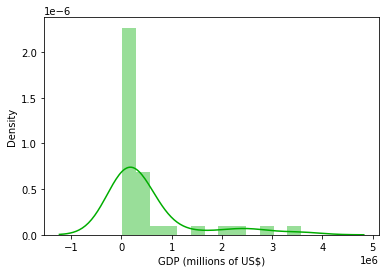

In [43]:
sns.distplot(df_europe, color = '#00ad00')

In [44]:
test = stats.ttest_ind(df_Asia, df_europe,equal_var=False)

In [45]:
test

Ttest_indResult(statistic=0.5546583491057376, pvalue=0.5813877404597693)

# kết luận: 
    + với mức pvalue lớn hơn rất nhiều so với mức ý nghĩa => chấp nhận H0
    

# GDP trung bình của các quốc gia ở châu Âu và châu Mỹ là bằng nhau
    + tiến hành kiểm định:
        + với mức ý nghĩa 0.05
        + H0: châu âu = châu mỹ
        + H1: châu Âu # Châu mỹ

In [46]:
df_SouthAmerica = df[df['Continent'] == 'South America']['GDP (millions of US$)']

In [47]:
test = stats.ttest_ind(df_SouthAmerica, df_europe,equal_var=False)

In [48]:
test

Ttest_indResult(statistic=-0.19407235215980828, pvalue=0.8490774181286702)

+ kết luận : pvalue lớn hơn rất nhiều so với mức ý nghĩa vì ta chấp nhận H0